## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)

dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [2]:

neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Preço')

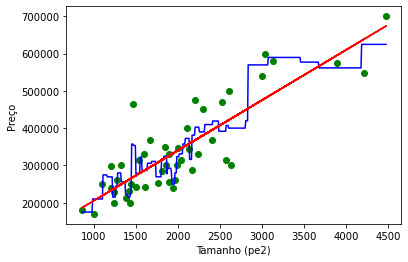

In [3]:
linear = LinearRegression().fit(X,y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)


plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')
plt.plot(X, linear.predict(X),color='r')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).
    
    

### Importando bibliotecas

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#### Utilizando base de Portland

In [25]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

In [47]:
# Treinando modelo KNN
neigh = KNeighborsRegressor(n_neighbors=4,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=4)

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Preço')

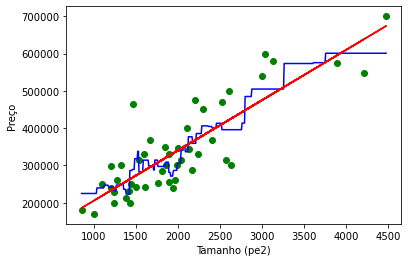

In [48]:
# Treinando modelo de regressão linear
linear = LinearRegression().fit(X,y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
P = np.linspace(min(y.values.ravel()),max(y.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)


plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')
plt.plot(X, linear.predict(X),color='r')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [16]:
# Criando métricas RSS e R²
def calc_rss(y,predicted):
    for i in predicted:
        return float(((i - y) ** 2).sum())
    
def calc_r2(y,predicted):
   
        return r2_score(predicted,y)

In [50]:
rss = calc_rss(P,y_)
r2 = calc_r2(P,y_)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 33848352466808.613
Métrica R²: 0.9342730908493013


### Utilizando base de dados Advertising

In [67]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
X_adv = dados_adv.loc[:,['TV']]
y_adv = dados_adv.loc[:,['sales']]

In [68]:
# Treinando modelo
neigh_adv = KNeighborsRegressor(n_neighbors=2,weights='distance')
neigh_adv.fit(X_adv,y_adv)

KNeighborsRegressor(n_neighbors=2, weights='distance')

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sales')

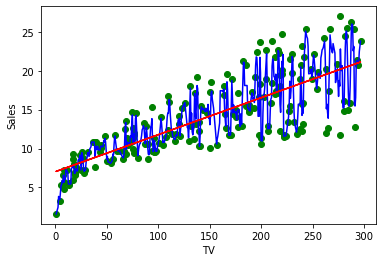

In [69]:
linear_adv = LinearRegression().fit(X_adv,y_adv)

T_adv = np.linspace(min(X_adv.values.ravel()),max(X_adv.values.ravel()), 500 )[:, np.newaxis]
P_adv = np.linspace(min(y_adv.values.ravel()),max(y_adv.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh_adv.predict(T_adv)


plt.scatter(X_adv, y_adv,color='g')
plt.plot(T_adv, y_,color='b')
plt.plot(X_adv, linear_adv.predict(X_adv),color='r')

plt.xlabel('TV')
plt.ylabel('Sales')

In [70]:
rss = calc_rss(P_adv,y_)
r2 = calc_r2(P_adv,y_)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 107634.40881763527
Métrica R²: 0.3299331061333757


## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [4]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor()

Text(0, 0.5, 'Preço')

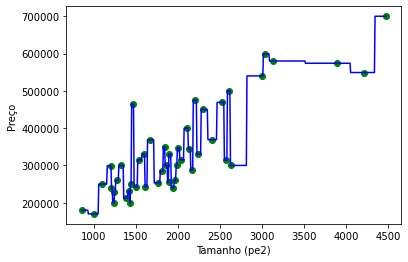

In [5]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

In [7]:
from sklearn.tree import export_graphviz  
 

export_graphviz(tree, out_file ='tree.dot', 
               feature_names =['Tamanho'])

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

In [82]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

In [83]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor()

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Preço')

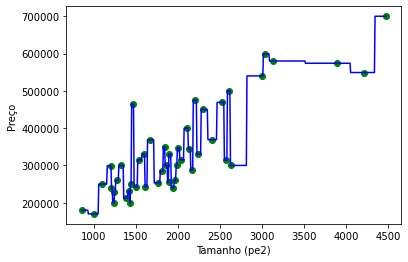

In [84]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).

#### Separando base de dados em treinamento e teste

In [3]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
X_por = dados_por.loc[:,['tamanho']]
y_por = dados_por.loc[:,['preco']]

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
X_adv = dados_adv.loc[:,['TV']]
y_adv = dados_adv.loc[:,['sales']]

In [13]:
from sklearn.model_selection import train_test_split

X_treino_adv, X_teste_adv, y_treino_adv, y_teste_adv = train_test_split(X_adv, y_adv, test_size=0.33, random_state=42)
X_treino_por, X_teste_por, y_treino_por, y_teste_por = train_test_split(X_por, y_por, test_size=0.33, random_state=42)

print('Tamanho do X de treino do portland:', X_treino_por.shape)
print('Tamanho do X de teste do portland:', X_teste_por.shape)
print('Tamanho do X de treino do advertising:', X_treino_adv.shape)
print('Tamanho do X de teste do advertising:', X_teste_adv.shape)


Tamanho do X de treino do portland: (31, 1)
Tamanho do X de teste do portland: (16, 1)
Tamanho do X de treino do advertising: (134, 1)
Tamanho do X de teste do advertising: (66, 1)


#### Treinando os modelos

In [7]:
from sklearn.neighbors import KNeighborsRegressor
# Treinando modelo Knn com a base Advertising
neigh_adv = KNeighborsRegressor(n_neighbors=2,weights='distance')
neigh_adv.fit(X_treino_adv,y_treino_adv)

# Treinando modelo Knn com a base Portland
neigh_por = KNeighborsRegressor(n_neighbors=2,weights='distance')
neigh_por.fit(X_treino_por,y_treino_por)

from sklearn.tree import DecisionTreeRegressor  
# Treinando Arvore com a base Advertising
arvore_adv = DecisionTreeRegressor().fit(X_treino_adv,y_treino_adv)   

# Treinando Arvore com a base Portland
arvore_por = DecisionTreeRegressor().fit(X_treino_por,y_treino_por)  

#### Testando modelo KNN

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Preço')

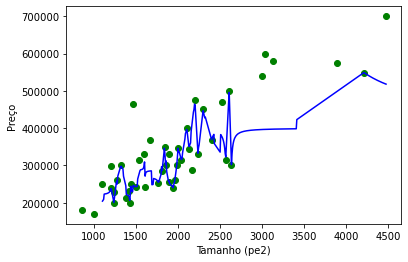

In [19]:
# Usando a base Portland
T_por = np.linspace(min(X_teste_por.values.ravel()),max(X_teste_por.values.ravel()), 500 )[:, np.newaxis]
P = np.linspace(min(y_teste_por.values.ravel()),max(y_teste_por.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh_por.predict(T_por)


plt.scatter(X_por, y_por,color='g')
plt.plot(T_por, y_,color='b')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [20]:
rss = calc_rss(P,y_)
r2 = calc_r2(P,y_)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 41650982106764.53
Métrica R²: 0.10588520313907102


/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sales')

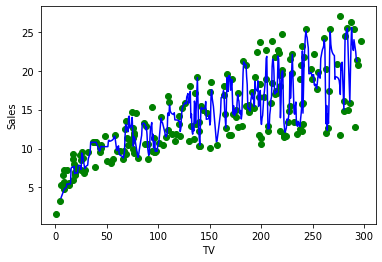

In [21]:
# Usando a base Advertising
T_adv = np.linspace(min(X_teste_adv.values.ravel()),max(X_teste_adv.values.ravel()), 500 )[:, np.newaxis]
P = np.linspace(min(y_teste_adv.values.ravel()),max(y_teste_adv.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh_adv.predict(T_adv)


plt.scatter(X_adv, y_adv,color='g')
plt.plot(T_adv, y_,color='b')
plt.xlabel('TV')
plt.ylabel('Sales')

In [22]:
rss = calc_rss(P,y_)
r2 = calc_r2(P,y_)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 85203.29463123776
Métrica R²: 0.5461939669897529


#### Testando modelo Árvore

/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Preço')

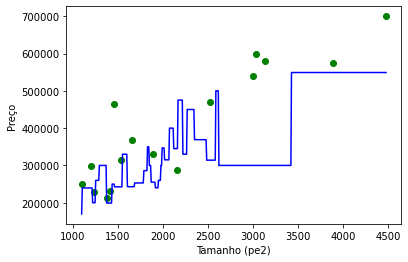

In [27]:
# Usando a base Portland
plt.scatter(X_teste_por, y_teste_por,color='g')
y_t = arvore_por.predict(T_por)
plt.plot(T_por, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [28]:
rss = calc_rss(P,y_t)
r2 = calc_r2(P,y_t)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 14430397169712.469
Métrica R²: -9.414831496408084


/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Sales')

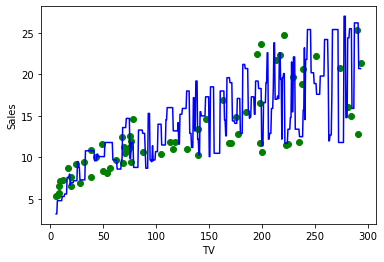

In [29]:
# Usando a base Advertising
plt.scatter(X_teste_adv, y_teste_adv,color='g')
y_t = arvore_adv.predict(T_adv)
plt.plot(T_adv, y_t,color='b')

plt.xlabel('TV')
plt.ylabel('Sales')

In [30]:
rss = calc_rss(P,y_t)
r2 = calc_r2(P,y_t)
print('Métrica RSS:', rss)
print(f'Métrica R²: {r2}')

Métrica RSS: 90712.46993987975
Métrica R²: 0.42900807433450394
